# **1. Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


#  **2. Loading the data**

In [2]:
df=pd.read_csv('/content/HepatitisCdata.csv')
df.shape

(615, 14)

In [3]:
df.head(10)

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


# **3. Visualisations** 

###Heatmap

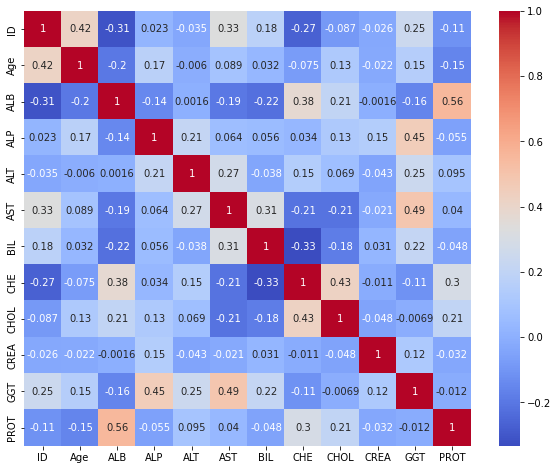

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap with a bigger size
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the heatmap
plt.show()

###Pair plots

In [5]:
# Create a pairplot
#sns.pairplot(df)

# Show the pairplot
#plt.show()


###Box plots

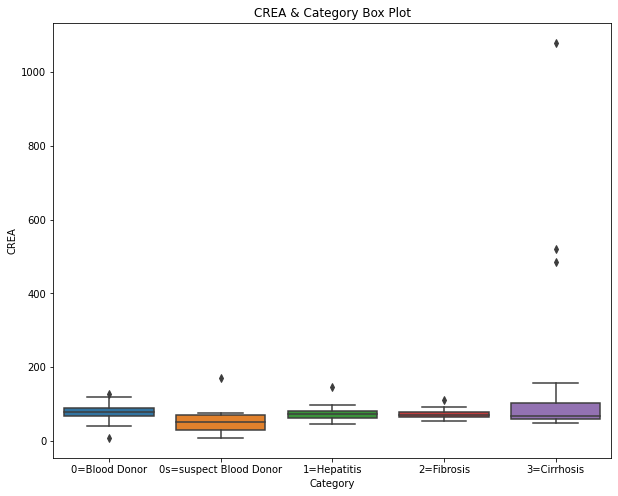

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with a larger size
plt.figure(figsize=(10, 8))

# Create a box plot
sns.boxplot(x='Category', y='CREA', data=df)

# Add a title
plt.title('CREA & Category Box Plot')

# Show the plot
plt.show()


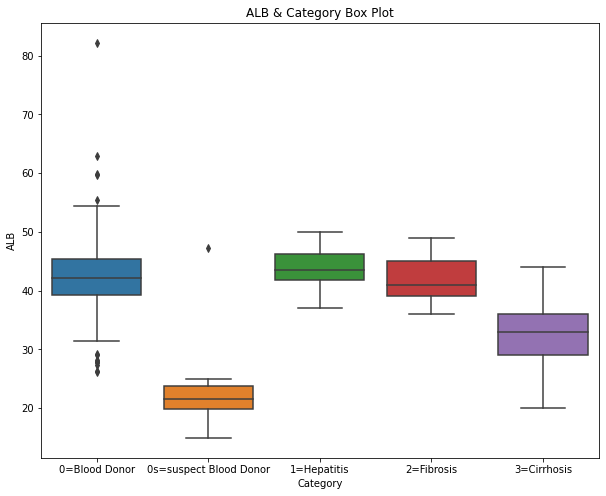

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with a larger size
plt.figure(figsize=(10, 8))

# Create a box plot
sns.boxplot(x='Category', y='ALB', data=df)

# Add a title
plt.title('ALB & Category Box Plot')

# Show the plot
plt.show()


### Violin plot

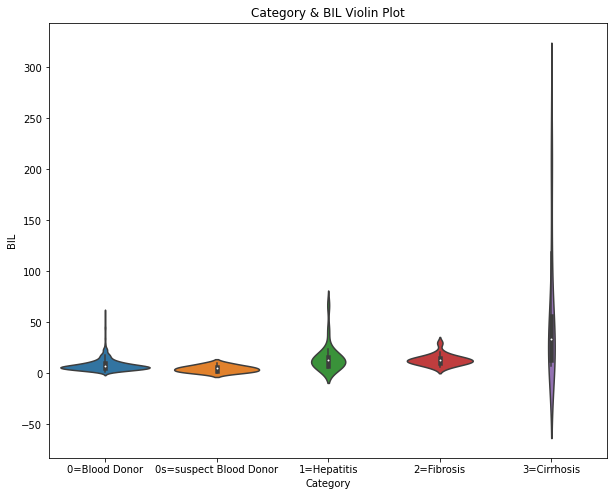

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with a larger size
plt.figure(figsize=(10, 8))

# Create a violin plot
sns.violinplot(x='Category', y='BIL', data=df)

# Add a title
plt.title('Category & BIL Violin Plot')

# Show the plot
plt.show()

###Scatter plots

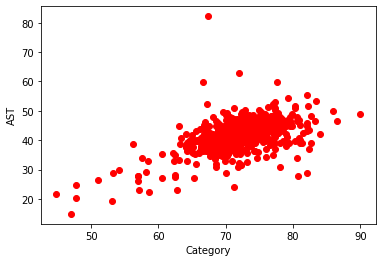

In [9]:
# The correlation between category and AST
x = df['PROT']
y = df['ALB']

# Plot the data as a scatter plot
plt.scatter(x, y, Color='red')

# Add labels to the x and y axes
plt.xlabel('Category')
plt.ylabel('AST')

# Show the plot
plt.show()

# **4. Preprocessing**

### Data cleaning

In [10]:
#Checking missing values
df.isnull().sum()

ID           0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [11]:
#Handling missing values
df=df.dropna()

In [12]:
df.shape

(589, 14)

In [13]:
df.isnull().sum()

ID          0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [14]:
# Remove duplicates
df = df.drop_duplicates()

In [15]:
df.shape

(589, 14)

###Checking imbalanced data

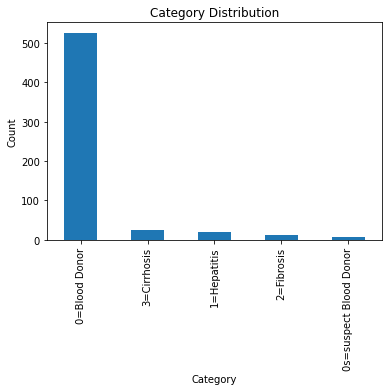

In [16]:
# Making bar plots to check Category distributions 
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

plt.show()

In [17]:
df['Category'].value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [18]:
#As shown in the visulization and value count function that the data is imbalanced so oversampling or undersampling must be done   

### Handling categorical features

In [19]:
# Encoding the categorical feature into numeric values
df['Category'], uniques = pd.factorize(df['Category'])


In [20]:
# Encoding the categorical feature (Sex) into numeric values
df['Sex'], uniques = pd.factorize(df['Sex'])

In [21]:
print(df.dtypes)

ID            int64
Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


###Undersampling the majority class

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop('Category', axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np


sampler = RandomUnderSampler(sampling_strategy='majority')

# fit and transform the data to undersample the majority class
X_r, y_r = sampler.fit_resample(X_train, y_train)

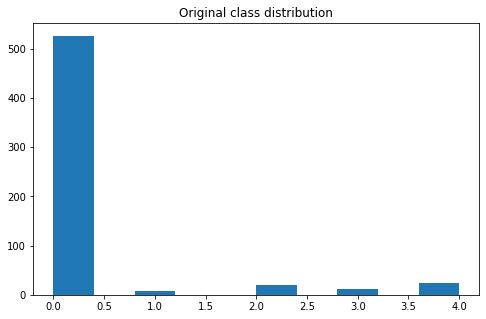

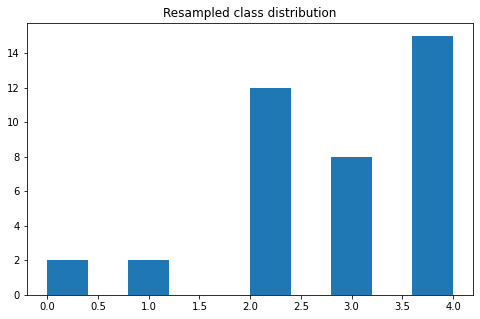

In [24]:
# Original class distribution
plt.figure(figsize=(8, 5))
plt.hist(y)
plt.title("Original class distribution")
plt.show()

# Oversampled class distribution
plt.figure(figsize=(8, 5))
plt.hist(y_r)
plt.title("Resampled class distribution")
plt.show()

#**5. Modeling**

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

scores = []
precisions = []
recalls = []
f1s = []
for i in range(50):
    
    model = RandomForestClassifier()
    model.fit(X_r, y_r)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred ,average='macro',zero_division=0.0)
    recall = recall_score(y_test, y_pred,average='macro',zero_division=0.0)
    f1 = f1_score(y_test, y_pred,average='macro',zero_division=0.0)
    scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Calculate the average accuracy, precision, recall, and F1 score
RF_average_score = np.mean(scores)
RF_average_precision = np.mean(precisions)
RF_average_recall = np.mean(recalls)
RF_average_f1 = np.mean(f1s)

print("RF accuracy score:", RF_average_score)
print("RF precision score:", RF_average_precision)
print("RF recall score:", RF_average_recall)
print("RF F1 score:", RF_average_f1)

RF accuracy score: 0.4461016949152543
RF precision score: 0.6254692207202796
RF recall score: 0.6694218543046356
RF F1 score: 0.5490841301843872


### XGboost

In [26]:
import xgboost as xgb

scores = []
precisions = []
recalls = []
f1s = []
for i in range(50):
    
    model = xgb.XGBClassifier()
    model.fit(X_r, y_r)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred ,average='macro',zero_division=0.0)
    recall = recall_score(y_test, y_pred,average='macro',zero_division=0.0)
    f1 = f1_score(y_test, y_pred,average='macro',zero_division=0.0)
    scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Calculate the average accuracy, precision, recall, and F1 score
XG_average_score = np.mean(scores)
XG_average_precision = np.mean(precisions)
XG_average_recall = np.mean(recalls)
XG_average_f1 = np.mean(f1s)

print("XGboost accuracy score:", XG_average_score)
print("XGboost precision score:", XG_average_precision)
print("XGboost recall score:", XG_average_recall)
print("XGboost F1 score:", XG_average_f1)







XGboost accuracy score: 0.8248587570621468
XGboost precision score: 0.7745777777777779
XGboost recall score: 0.8429139072847682
XGboost F1 score: 0.7509881422924901


### Gradient boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scores = []
precisions = []
recalls = []
f1s = []
for i in range(50):
    model = GradientBoostingClassifier()
    model.fit(X_r, y_r)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred ,average='macro',zero_division=0.0)
    recall = recall_score(y_test, y_pred,average='macro',zero_division=0.0)
    f1 = f1_score(y_test, y_pred,average='macro',zero_division=0.0)
    scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Calculate the average accuracy, precision, recall, and F1 score
GB_average_score = np.mean(scores)
GB_average_precision = np.mean(precisions)
GB_average_recall = np.mean(recalls)
GB_average_f1 = np.mean(f1s)

print("GB accuracy score:", GB_average_score)
print("GB precision score:", GB_average_precision)
print("GB recall score:", GB_average_recall)
print("GB F1 score:", GB_average_f1)

 


GB accuracy score: 0.9661016949152541
GB precision score: 0.92
GB recall score: 0.9147019867549671
GB F1 score: 0.8973154362416108


###AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

scores = []
precisions = []
recalls = []
f1s = []
for i in range(50):
    adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
    model.fit(X_r, y_r)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred ,average='macro',zero_division=0.0)
    recall = recall_score(y_test, y_pred,average='macro',zero_division=0.0)
    f1 = f1_score(y_test, y_pred,average='macro',zero_division=0.0)
    scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Calculate the average accuracy, precision, recall, and F1 score
AD_average_score = np.mean(scores)
AD_average_precision = np.mean(precisions)
AD_average_recall = np.mean(recalls)
AD_average_f1 = np.mean(f1s)

print("AD accuracy score:", AD_average_score)
print("AD precision score:", AD_average_precision)
print("AD recall score:", AD_average_recall)
print("AD F1 score:", AD_average_f1)


AD accuracy score: 0.9661016949152541
AD precision score: 0.92
AD recall score: 0.9147019867549671
AD F1 score: 0.8973154362416108


### Decision tree

In [29]:
from sklearn import tree

scores = []
precisions = []
recalls = []
f1s = []
for i in range(50):
    model = tree.DecisionTreeClassifier()
    model.fit(X_r, y_r)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred ,average='macro',zero_division=0.0)
    recall = recall_score(y_test, y_pred,average='macro',zero_division=0.0)
    f1 = f1_score(y_test, y_pred,average='macro',zero_division=0.0)
    scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Calculate the average accuracy, precision, recall, and F1 score
DT_average_score = np.mean(scores)
DT_average_precision = np.mean(precisions)
DT_average_recall = np.mean(recalls)
DT_average_f1 = np.mean(f1s)

print("DT accuracy score:", DT_average_score)
print("DT precision score:", DT_average_precision)
print("DT recall score:", DT_average_recall)
print("DT F1 score:", DT_average_f1)

DT accuracy score: 0.9568361581920903
DT precision score: 0.8898377793522712
DT recall score: 0.9125298013245033
DT F1 score: 0.8931243140121755


#**6. Comparison between different models**#

Before focusing on the evaluation measures, It's good to know that in imbalanced data classifications, the accuracy measure is'nt reliable.

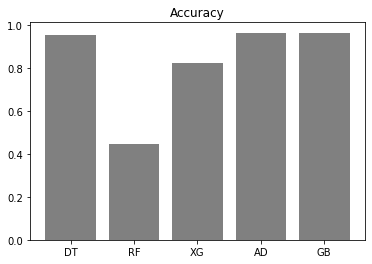

In [30]:
import matplotlib.pyplot as plt

# data for the bars
data = [DT_average_score, RF_average_score, XG_average_score,AD_average_score , GB_average_score]

# create the bar chart
plt.bar(range(len(data)), data,color='gray')

# add labels for the x-axis
plt.xticks(range(len(data)), ['DT', 'RF', 'XG', 'AD', 'GB'])

# add a title
plt.title("Accuracy")

# display the chart
plt.show()


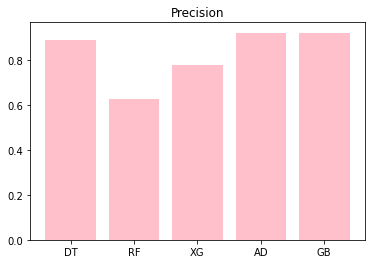

In [31]:
import matplotlib.pyplot as plt

# data for the bars
data = [DT_average_precision, RF_average_precision, XG_average_precision,AD_average_precision , GB_average_precision]

# create the bar chart
plt.bar(range(len(data)), data, color='pink')

# add labels for the x-axis
plt.xticks(range(len(data)), ['DT', 'RF', 'XG', 'AD', 'GB'])

# add a title
plt.title("Precision")

# display the chart
plt.show()

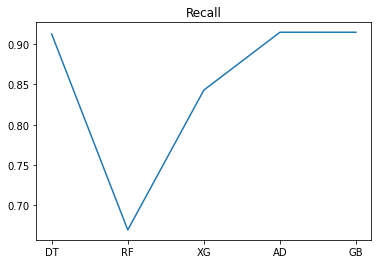

In [32]:
import matplotlib.pyplot as plt

# data for the line
data = [DT_average_recall, RF_average_recall ,XG_average_recall ,AD_average_recall , GB_average_recall]

# create the line chart
plt.plot(data)

# add labels for the x-axis
plt.xticks(range(len(data)), ['DT', 'RF', 'XG', 'AD', 'GB'])

# add a title
plt.title("Recall")

# display the chart
plt.show()


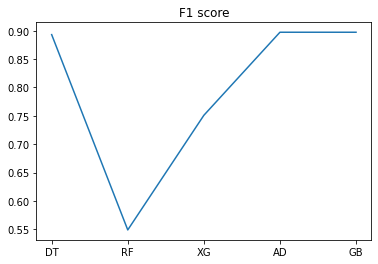

In [33]:
import matplotlib.pyplot as plt

# data for the line
data = [DT_average_f1, RF_average_f1 ,XG_average_f1 ,AD_average_f1 , GB_average_f1]

# create the line chart
plt.plot(data)

# add labels for the x-axis
plt.xticks(range(len(data)), ['DT', 'RF', 'XG', 'AD', 'GB'])

# add a title
plt.title("F1 score")

# display the chart
plt.show()